In [1]:
import pandas as pd
import numpy as np

# adjust filename if needed
import pandas as pd

df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")



df.shape, df.head()


((7043, 21),
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV Streamin

In [2]:
summary = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "missing_%": (df.isna().mean() * 100).round(2).values,
    "unique_values": df.nunique(dropna=True).values
}).sort_values("missing_%", ascending=False)

summary


,column,dtype,missing_%,unique_values
0,customerID,object,0.0,7043
11,DeviceProtection,object,0.0,3
19,TotalCharges,object,0.0,6531
18,MonthlyCharges,float64,0.0,1585
17,PaymentMethod,object,0.0,4
16,PaperlessBilling,object,0.0,2
15,Contract,object,0.0,3
14,StreamingMovies,object,0.0,3
13,StreamingTV,object,0.0,3
12,TechSupport,object,0.0,3


summary table already tells us the 1 big cleaning issue:

"TotalCharges" is object (should be numeric)

Even though missing_% shows 0.0, this dataset usually has blank strings " " which pandas does NOT count as missing.

That’s why:

TotalCharges unique values = 6531 (not all numeric clean)

dtype = object

## Do cleaning

### Drop CustomerId

we drop customerID

Because customerID is an identifier, not a meaningful feature.

It is:

Unique for every customer (you have 7043 unique values for 7043 rows)

Doesn’t describe behavior, usage, price, contract, etc.

Has no real relationship to churn — it’s just a label

So it adds noise, not information.

In [3]:
df = df.drop(columns=["customerID"])


## Fix TotalCharges


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].astype(str).str.strip(), errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


## Convert categoricals to category

In [5]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].astype("category")


## After Cleaning Summary

In [6]:
summary_after = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "missing_%": (df.isna().mean() * 100).round(2).values,
    "unique_values": df.nunique(dropna=True).values
}).sort_values("missing_%", ascending=False)

summary_after


,column,dtype,missing_%,unique_values
0,gender,category,0.0,2
1,SeniorCitizen,int64,0.0,2
18,TotalCharges,float64,0.0,6531
17,MonthlyCharges,float64,0.0,1585
16,PaymentMethod,category,0.0,4
15,PaperlessBilling,category,0.0,2
14,Contract,category,0.0,3
13,StreamingMovies,category,0.0,3
12,StreamingTV,category,0.0,3
11,TechSupport,category,0.0,3


## After Cleaning – Summary Notes

###  Data Quality Check
- Dataset contains **21 columns**
- **Missing values:** 0% missing across **all columns**
- No null-handling was ultimately required after cleanup

###  Data Type Standardization
- Converted all categorical/text features to **category dtype** for cleaner handling and memory efficiency
- Numeric features remain in numeric format:
  - `tenure` → int64
  - `SeniorCitizen` → int64 (binary indicator)
  - `MonthlyCharges` → float64
  - `TotalCharges` → float64

###  Feature Uniqueness Overview
- **Binary categorical features (2 unique values):**
  - `gender`, `Partner`, `Dependents`, `PaperlessBilling`, `Churn`
- **Multi-category service features (3 unique values):**
  - `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`,  
    `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
  - *(typically values like Yes / No / No internet service)*
- **Contract type:** 3 unique values (`Contract`)
- **Payment method:** 4 unique values (`PaymentMethod`)

###  Numeric Feature Highlights
- `tenure`: 73 unique values (0–72 months likely)
- `MonthlyCharges`: 1,585 unique values
- `TotalCharges`: 6,531 unique values (continuous numeric behavior)

###  Ready for Next Step
The dataset is now:
- Clean (0 missing values)
- Properly typed (categorical vs numeric separated)
- Ready for **EDA + encoding strategies** 


Conclusion: The dataset is clean and consistent, with categorical features standardized for analysis and modeling readiness. No further cleaning is required at this stage.


## Save Cleaned DATA for next Analysis

In [7]:
import os

os.makedirs("../data/processed", exist_ok=True)

df.to_csv("../data/processed/cleaned_customer_churn.csv", index=False)


import os
os.getcwd()


import os
os.listdir("../data")


## Churn Analysis Results (SQL-Equivalent)


In [8]:
import pandas as pd

df = pd.read_csv("../data/processed/cleaned_customer_churn.csv")
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn_by_contract = (
    df.groupby("Contract")
      .agg(
          total_customers=("Churn", "count"),
          churned_customers=("Churn", lambda x: (x == "Yes").sum())
      )
)

churn_by_contract["churn_rate_percent"] = (
    churn_by_contract["churned_customers"] /
    churn_by_contract["total_customers"] * 100
).round(2)

churn_by_contract.sort_values("churn_rate_percent", ascending=False)


,total_customers,churned_customers,churn_rate_percent
Contract,,,
Month-to-month,3875,1655,42.71
One year,1473,166,11.27
Two year,1695,48,2.83


In [10]:
churn_by_payment = (
    df.groupby("PaymentMethod")
      .agg(
          total_customers=("Churn", "count"),
          churned_customers=("Churn", lambda x: (x == "Yes").sum())
      )
)

churn_by_payment["churn_rate_percent"] = (
    churn_by_payment["churned_customers"] /
    churn_by_payment["total_customers"] * 100
).round(2)

churn_by_payment.sort_values("churn_rate_percent", ascending=False)


,total_customers,churned_customers,churn_rate_percent
PaymentMethod,,,
Electronic check,2365,1071,45.29
Mailed check,1612,308,19.11
Bank transfer (automatic),1544,258,16.71
Credit card (automatic),1522,232,15.24


In [11]:
python3 -m pip3 install matplotlib


SyntaxError: invalid syntax (1824577439.py, line 1)

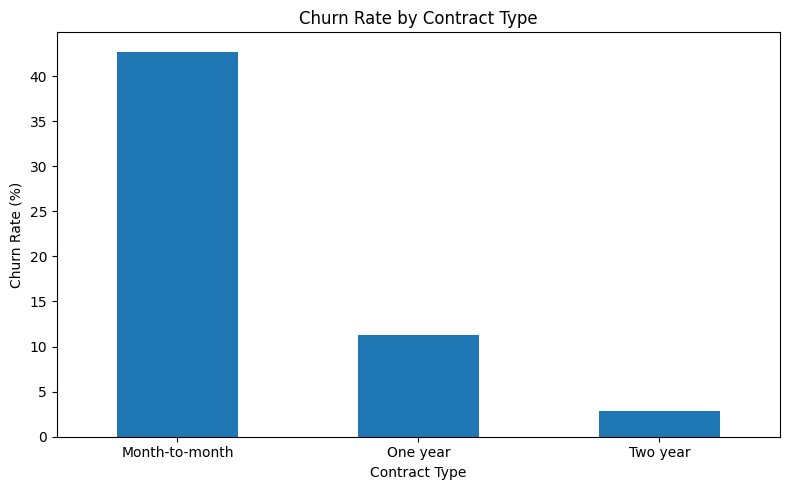

In [12]:
import matplotlib.pyplot as plt

churn_by_contract["churn_rate_percent"].plot(
    kind="bar",
    figsize=(8, 5)
)

plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
